# Machine Learning Project by Teodor Chakarov

# Fake and real news dataset

Fake news are problem nowadays for this missinforamtion that we have all around the Internet and social media. Canwe really distinguish the difference between real and fake news. Can we make a good model for NLP so we can easily say if we can trust one news' source or not?

So I will explore and clean 2 csv files that i downloaded from "https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset". 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import datetime 

In [91]:
import re, string
import nltk 
import nltk as nlp

import unicodedata
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

from sklearn.decomposition import PCA

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV

from sklearn.linear_model import LogisticRegression, SGDClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, plot_confusion_matrix, plot_roc_curve, make_scorer, confusion_matrix

from sklearn.pipeline import Pipeline

from sklearn.base import BaseEstimator, is_classifier, is_regressor, is_outlier_detector

In [3]:
np.random.seed(42)

In [4]:
fake_news = pd.read_csv('data/Fake.csv')
real_news = pd.read_csv('data/True.csv')

In [5]:
fake_news

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [6]:
real_news

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


I will merge those 2 datasets and I will add another column for category (Fake: 0, Real: 1) 

In [7]:
fake_news['category'] = 0
real_news['category'] = 1

In [8]:
news = pd.concat([fake_news, real_news])

In [9]:
news = news.reset_index()

In [10]:
news = news.drop('index', axis = 1)

In [11]:
news

,title,text,subject,date,category
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [12]:
news.isna().sum()

title       0
text        0
subject     0
date        0
category    0
dtype: int64

E:\programi\Anaconda Python\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


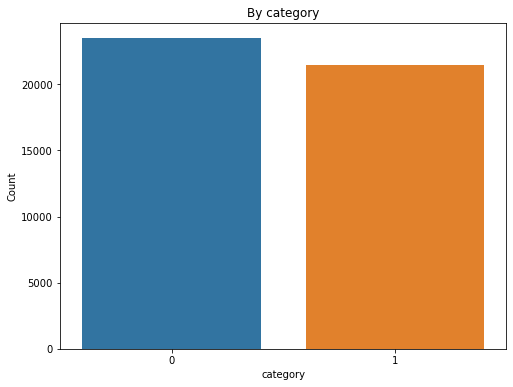

In [13]:
plt.figure(figsize=(8,6))

plt.title('By category')

sns.countplot(news.category)

plt.ylabel("Count")

plt.show()

The Dataset is well banalced in terms of news category also we don't have NaN values which i good 

#### Analysing the date

I noticed that I can't covert to pd.to_datetime because i have different date column records.

In [14]:
news[news['date'].str.len() > 19]

,title,text,subject,date,category
9358,https://100percentfedup.com/served-roy-moore-v...,https://100percentfedup.com/served-roy-moore-v...,politics,https://100percentfedup.com/served-roy-moore-v...,0
15507,https://100percentfedup.com/video-hillary-aske...,https://100percentfedup.com/video-hillary-aske...,politics,https://100percentfedup.com/video-hillary-aske...,0
15508,https://100percentfedup.com/12-yr-old-black-co...,https://100percentfedup.com/12-yr-old-black-co...,politics,https://100percentfedup.com/12-yr-old-black-co...,0
15839,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,0
15840,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,0
17432,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...,0
17433,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...,0
18933,Homepage,[vc_row][vc_column width= 1/1 ][td_block_trend...,left-news,MSNBC HOST Rudely Assumes Steel Worker Would N...,0
21869,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...,0
21870,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...,0


Basically I will create new variable with those 10 records droped for date analysis.

In [15]:
http_filter = news['date'].str.contains('http')

In [16]:
news_date = news[~http_filter]

In [17]:
news_date = news_date[~news_date.date.str.contains('MSNB')]

In [18]:
news_date

,title,text,subject,date,category
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [19]:
news_date['date'] = pd.to_datetime(news_date.date)

In [20]:
news_date

,title,text,subject,date,category
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,0
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,2017-08-22,1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,2017-08-22,1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,2017-08-22,1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,2017-08-22,1


#### Distribution of the news in the time period

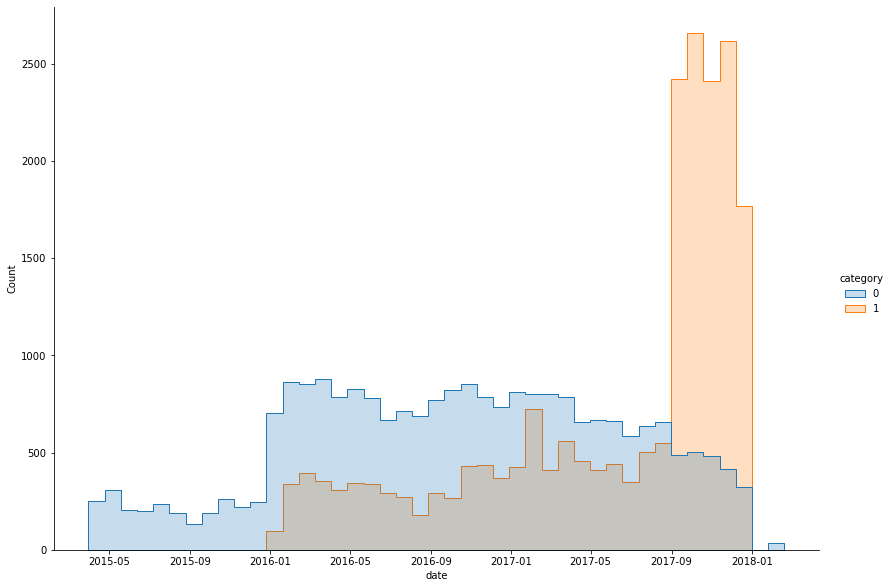

In [21]:
sns.displot(news_date, x=news_date.date, hue="category", element = 'step', height=8.27, aspect=11.7/8.27)

We can see the destribution for the news through time and we can see that real news we have much move form period 2019/09 to 2018/01 but for fake we have more frequent int the past 

#### Count of news per year per news category

E:\programi\Anaconda Python\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


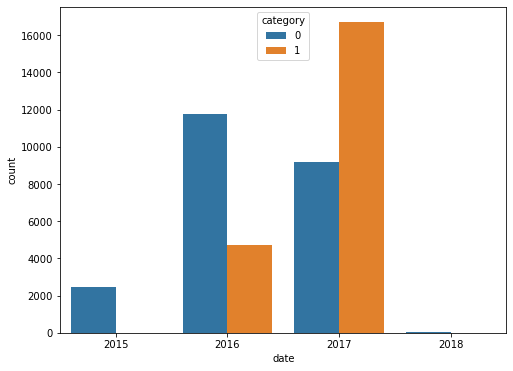

In [22]:
plt.close()
plt.figure(figsize=(8,6))
sns.countplot(news_date.date.dt.year, data=news_date, hue='category')
plt.show()

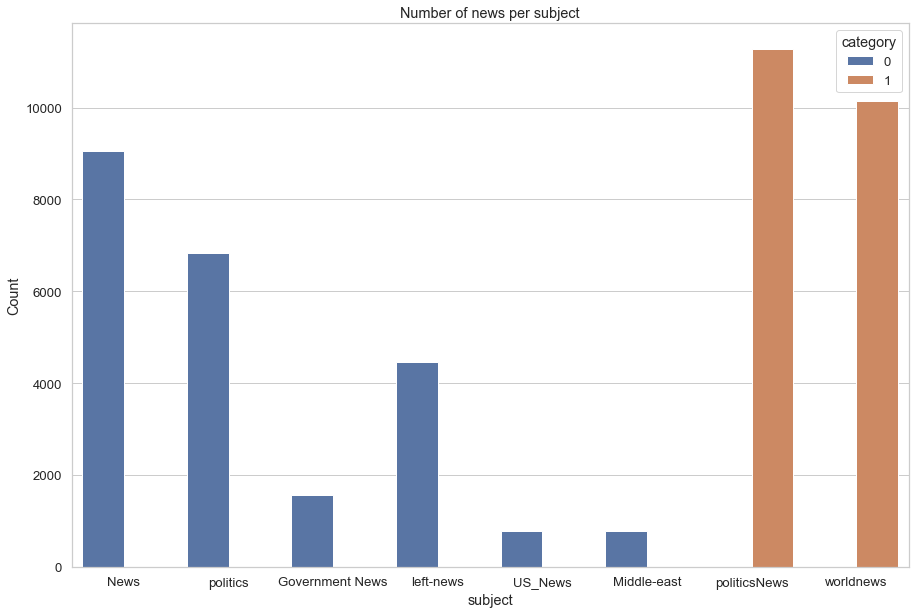

In [23]:
plt.figure(figsize=(15,10))
sns.set(style = "whitegrid",font_scale = 1.2)

plt.title('Number of news per subject')

sns.countplot(x= 'subject', hue = 'category', data = news)

plt.ylabel("Count")

plt.show()

We can see we have different kind of subjects for both true and fake news. We are going to delete this column in the generel text we are going to inspect.

I'm going to combine text and title columns so we can inspect the whole text in general

In [24]:
raw_txt = pd.DataFrame()

In [25]:
raw_txt['category'] = news.category
raw_txt['text'] = news['text'] + " " + news['title']

In [26]:
raw_txt['text'] = raw_txt.apply(lambda x: x['text'].lower(),axis=1)

In [27]:
raw_txt.text = raw_txt.text.str.replace('[^\w\s]','')

In [28]:
raw_txt

,category,text
0,0,donald trump just couldn t wish all americans ...
1,0,house intelligence committee chairman devin nu...
2,0,on friday it was revealed that former milwauke...
3,0,on christmas day donald trump announced that h...
4,0,pope francis used his annual christmas day mes...
...,...,...
44893,1,brussels reuters nato allies on tuesday welco...
44894,1,london reuters lexisnexis a provider of legal...
44895,1,minsk reuters in the shadow of disused soviet...
44896,1,moscow reuters vatican secretary of state car...


## General text analisys

### Data Cleaning

#### Perform data cleaning process so we can proceed with ML part

In [29]:
stop = set(stopwords.words('english'))

In [30]:
def stemming(text):
    wnl = nlp.stem.WordNetLemmatizer()
    stopwords = nlp.corpus.stopwords.words('english')
    text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [31]:
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)
#Removing the noisy text
def denoise_text(text):
    text = remove_stopwords(text).lower()
    re.sub(r'http\S+', '', text)
    re.sub(r'[^\w\s]', '', text)
    wnl = nlp.stem.WordNetLemmatizer()
    
    return wnl.lemmatize(text)

In [32]:
def GetModelScores (estimator, X_train, y_train):
    from sklearn.model_selection import cross_validate
    
    estimator.fit(X_train, y_train)
    
    scoring = {'acc': 'accuracy','f1_score': 'f1_weighted','roc_auc': 'roc_auc'}
    
    scores = cross_validate(estimator, X_train, y_train, cv=5, scoring = scoring,  return_train_score=True)
    
            
    #print(scores.keys())
    print(f"Accuracity on Training: {scores['train_acc'].max()} and Validating: {scores['test_acc'].max()}")
    print(f"F1_Score on Training: {scores['train_f1_score'].max()} and Validating: {scores['test_f1_score'].max()}")
    print(f"ROC_AUC Score on Training: {scores['train_roc_auc'].max()} and Validating: {scores['test_roc_auc'].max()}")

In [33]:
class ClfSwitcher(BaseEstimator):

    def __init__(self, estimator = LogisticRegression()):

        self.estimator = estimator


    def fit(self, X, y=None, **kwargs):
        self.estimator.fit(X, y)
        return self


    def predict(self, X, y=None):
        return self.estimator.predict(X)


    def predict_proba(self, X):
        return self.estimator.predict_proba(X)


    def score(self, X, y):
        return self.estimator.score(X, y)

In [34]:
fake_words = stemming(''.join(str(raw_txt[raw_txt.category == 0]['text'].tolist())))
real_words = stemming(''.join(str(raw_txt[raw_txt.category == 1]['text'].tolist())))

I joined all the rows for each fake and real news to list.

In [35]:
raw_txt['text']=raw_txt['text'].apply(denoise_text)

Performed general denoisation in the text

#### N_Grams for Real News and Fake

Biagram Fake news

In [36]:
pd.Series(nlp.ngrams(fake_words,2)).value_counts()[:30]

(donald, trump)             13870
(hillary, clinton)           7093
(white, house)               6611
(united, state)              6210
(image, via)                 6194
(new, york)                  4284
(president, trump)           4082
(president, obama)           3958
(fox, news)                  3452
(barack, obama)              2283
(trump, supporter)           2243
(21st, century)              2229
(donald, j)                  2167
(j, trump)                   2134
(fake, news)                 1966
(supreme, court)             1932
(century, wire)              1928
(trump, campaign)            1797
(national, security)         1702
(social, medium)             1698
(trump, realdonaldtrump)     1694
(obama, administration)      1680
(police, officer)            1651
(bernie, sander)             1611
(secretary, state)           1586
(state, department)          1580
(law, enforcement)           1578
(life, matter)               1569
(ted, cruz)                  1565
(york, time)  

Biagram Real news

In [37]:
pd.Series(nlp.ngrams(real_words,2)).value_counts()[:30]

(united, state)            12226
(donald, trump)            10179
(white, house)              9178
(washington, reuters)       6489
(north, korea)              6352
(president, donald)         5929
(new, york)                 4568
(prime, minister)           4221
(said, statement)           3926
(reuters, u)                3650
(islamic, state)            3626
(official, said)            3571
(u, president)              3560
(told, reuters)             3491
(trump, said)               3460
(last, year)                3370
(last, week)                3349
(told, reporter)            3184
(said, would)               3001
(president, barack)         2903
(supreme, court)            2709
(trump, administration)     2599
(hillary, clinton)          2532
(last, month)               2494
(said, trump)               2418
(barack, obama)             2377
(secretary, state)          2342
(united, nation)            2282
(house, representative)     2280
(national, security)        2178
dtype: int

Triagram Fake news

In [38]:
pd.Series(nlp.ngrams(fake_words,3)).value_counts()[:30]

(donald, j, trump)             2126
(21st, century, wire)          1904
(j, trump, realdonaldtrump)    1692
(new, york, time)              1529
(black, life, matter)          1371
(news, 21st, century)           949
(president, united, state)      912
(president, donald, trump)      885
(president, barack, obama)      861
(image, via, video)             787
(video, screen, capture)        728
(century, wire, say)            727
(via, video, screen)            667
(featured, image, via)          619
(new, york, city)               613
(george, w, bush)               590
(via, getty, image)             537
(director, james, comey)        494
(fbi, director, james)          491
(via, screen, capture)          482
(subscribe, become, member)     479
(21wire, subscribe, become)     471
(become, member, 21wiretv)      471
(belowfeatured, image, via)     450
(make, america, great)          442
(image, via, screen)            411
(affordable, care, act)         398
(supreme, court, justice)   

Triagram Real news

In [39]:
pd.Series(nlp.ngrams(real_words,3)).value_counts()[:30]

(president, donald, trump)          5855
(u, president, donald)              2534
(washington, reuters, u)            2352
(president, barack, obama)          1992
(reuters, u, president)             1010
(white, house, said)                 959
(president, barack, obamas)          910
(presidentelect, donald, trump)      829
(respond, request, comment)          799
(president, vladimir, putin)         789
(u, house, representative)           785
(nov, 8, election)                   775
(new, york, reuters)                 742
(reuters, president, donald)         688
(washington, reuters, president)     687
(u, secretary, state)                676
(secretary, state, rex)              672
(george, w, bush)                    668
(state, rex, tillerson)              661
(national, security, adviser)        652
(russian, president, vladimir)       610
(speaker, paul, ryan)                590
(minister, theresa, may)             587
(prime, minister, theresa)           584
(un, security, c

Here we saw how frequent 2 or 3 words we can see in the text. Most of them are in USA and aiming presidents and overseas relations. 

#### Cloud of Words

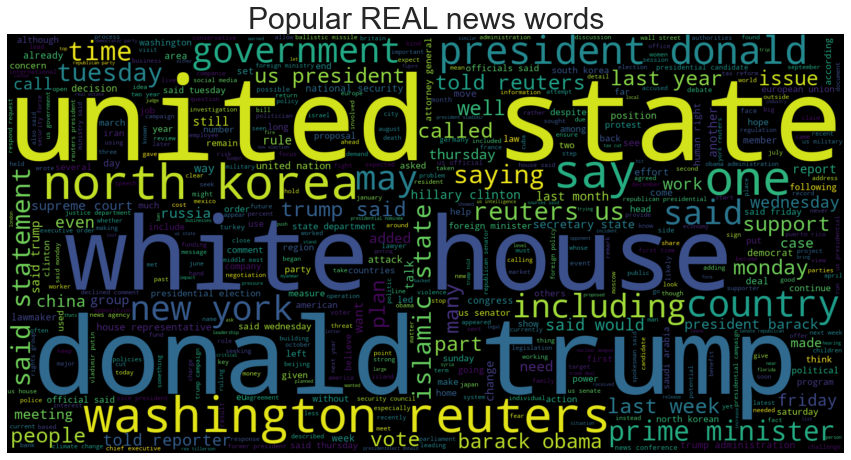

In [40]:
# Start with one review:
generic_words = " ".join(raw_txt[raw_txt.category == 1].text)

plt.figure(figsize  = (15,10))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=500, max_words=500, background_color="black", width = 1600 , height = 800).generate(
    generic_words)
plt.imshow(wordcloud_ALL, interpolation='bilinear')
plt.title('Popular REAL news words', fontsize=30)
plt.axis('off')
plt.show()

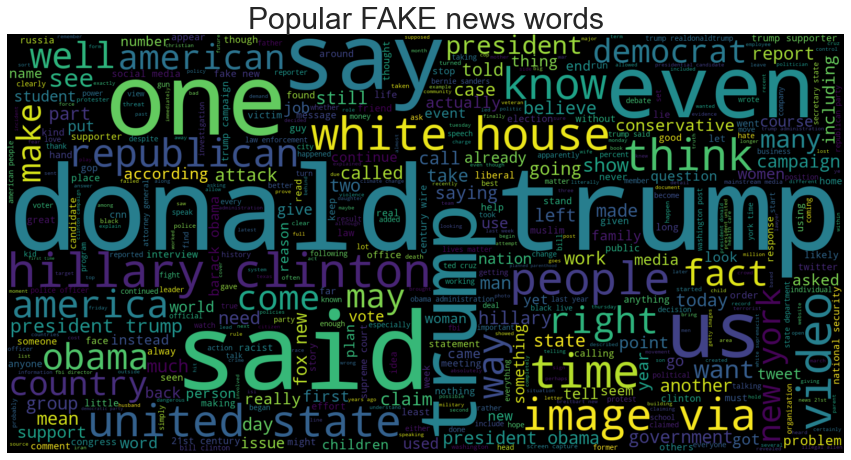

In [41]:
# Start with one review:
generic_words = " ".join(raw_txt[raw_txt.category == 0].text)

plt.figure(figsize  = (15,10))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=500, max_words=500, background_color="black", width = 1600 , height = 800).generate(
    generic_words)
plt.imshow(wordcloud_ALL, interpolation='bilinear')
plt.title('Popular FAKE news words', fontsize=30)
plt.axis('off')
plt.show()

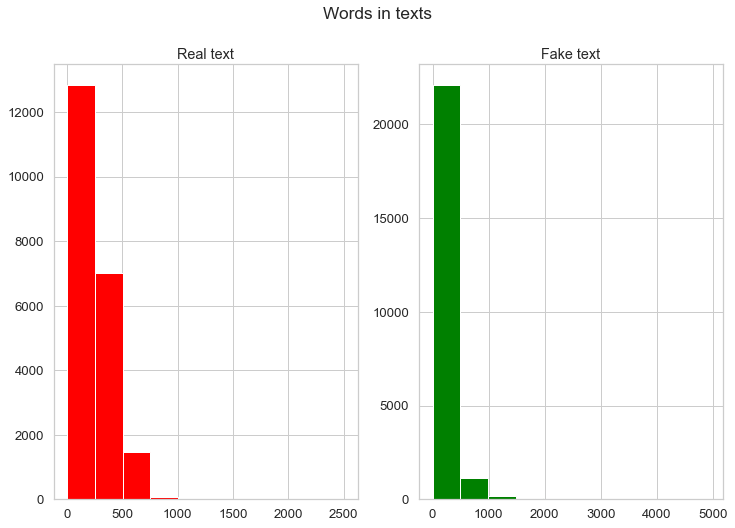

In [42]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=raw_txt[raw_txt['category']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='red')
ax1.set_title('Real text')
text_len=raw_txt[raw_txt['category']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='green')
ax2.set_title('Fake text')
fig.suptitle('Words in texts')
plt.show()

See words frequency in the text. Fake news are greather than Real news.

## Machine Learning

In this part we are going to see which algorithm is the best and is there a significant difference between TFIDF and Count Vectorisers.

In [43]:
X = raw_txt['text']
y = raw_txt['category']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, shuffle = True,
                                                   stratify = y, test_size = 0.15)

In [45]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((38163,), (38163,), (6735,), (6735,))

In [46]:
X_train_vectorised = TfidfVectorizer().fit_transform(X_train)

In [47]:
X_train

14622    stacey dash stranger controversy recently susp...
36666    berlin reuters german police monday investigat...
10306    manufactured news exposes hate leftist media r...
44185    juba reuters south sudanese judges ended fivem...
6239     rightwing ideologues voter suppression passing...
                               ...                        
9967     wfb north korea first time week revealed plans...
37478    mexico city reuters threat losing power fierce...
8895     president obama got real raw cnn anderson coop...
18855    producer women world event awkward moment thur...
24969    reuters happened hillary clintons memoir unsuc...
Name: text, Length: 38163, dtype: object

In [49]:
print(X_train_vectorised)

  (0, 207504)	0.03430713086826109
  (0, 16493)	0.06108253541518492
  (0, 23126)	0.0424438543495981
  (0, 57466)	0.03879991293214412
  (0, 14593)	0.05012715117207382
  (0, 204777)	0.026686232043150702
  (0, 181946)	0.028243627550223083
  (0, 157109)	0.0510983984941142
  (0, 201686)	0.020544877389403797
  (0, 14896)	0.04356320672862725
  (0, 45776)	0.04356320672862725
  (0, 140733)	0.015320264784955928
  (0, 116580)	0.019981616836100904
  (0, 211352)	0.026782911175410283
  (0, 64992)	0.04516902853191208
  (0, 111527)	0.03232345821580614
  (0, 77480)	0.03455711730081468
  (0, 79485)	0.03309820407869911
  (0, 210962)	0.020003033725398387
  (0, 64192)	0.03513629508031027
  (0, 139546)	0.027480005585299387
  (0, 133696)	0.0226713787105452
  (0, 164605)	0.09901222469879296
  (0, 51305)	0.035075417469455854
  (0, 73066)	0.07005488921610728
  :	:
  (38162, 90738)	0.01906973193834332
  (38162, 180591)	0.01853892316698467
  (38162, 198775)	0.019492345191031175
  (38162, 14272)	0.02849670936296386

The tuple represents: (document_id, token_id)

The value following the tuple represents the tf-idf score of a given token in a given document

The tuples that are not there have a tf-idf score of 0

In [50]:
GetModelScores(LogisticRegression(), X_train_vectorised, y_train)

Accuracity on Training: 0.9937111038322961 and Validating: 0.9889951526267523
F1_Score on Training: 0.9937114006589332 and Validating: 0.9889957980067652
ROC_AUC Score on Training: 0.9996204321234023 and Validating: 0.9992755354157917


In [51]:
GetModelScores(DecisionTreeClassifier(), X_train_vectorised, y_train)

Accuracity on Training: 1.0 and Validating: 0.9964627276300275
F1_Score on Training: 1.0 and Validating: 0.9964627062136895
ROC_AUC Score on Training: 1.0 and Validating: 0.9964491947366306


In [52]:
GetModelScores(MultinomialNB(), X_train_vectorised, y_train)

Accuracity on Training: 0.9541777210048803 and Validating: 0.9499541464692781
F1_Score on Training: 0.9541860386829297 and Validating: 0.9499639037969888
ROC_AUC Score on Training: 0.9896563517858441 and Validating: 0.9871096904052543


In [53]:
GetModelScores(SGDClassifier(), X_train_vectorised, y_train)

Accuracity on Training: 0.9969866692869542 and Validating: 0.9935805056989389
F1_Score on Training: 0.9969868027114968 and Validating: 0.9935809185985198
ROC_AUC Score on Training: 0.9998640847581313 and Validating: 0.9997093197655954


I have really good scores without any tuning?! Let's see with a little bit am I going to overfitt a lot or ... ?

In [93]:
pipeline = Pipeline([
    
    ('vect', TfidfVectorizer()),
    ('pca', PCA()),
    ('clf', ClfSwitcher())
    
])

### 1) Logistic Rregression

In [94]:
parameters_log = [

    {
        'clf__estimator': [LogisticRegression()],
        'vect__max_df': [0.75],
        'clf__estimator__penalty': ['l2'],
        'clf__estimator__C': [1,10,100]
        
    }
]

In [95]:
gscv_log = GridSearchCV(pipeline, parameters_log, scoring = 'f1')
gscv_log.fit(X_train, y_train)

E:\programi\Anaconda Python\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\programi\Anaconda Python\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\programi\Anaconda Python\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "E:\programi\Anaconda Python\lib\site-packages\sklearn\pipeline.py", line 296, in _fit
    **fit_params_steps[name])
  File "E:\programi\Anaconda Python\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "E:\programi\Anaconda Python\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "E:\pr

TypeError: PCA does not support sparse input. See TruncatedSVD for a possible alternative.

In [ ]:
gscv_log.best_estimator_

In [ ]:
gscv_log.best_score_

### 2) Decision Trees

In [59]:
parameters_DT = [
    {
        'clf__estimator': [DecisionTreeClassifier()], 
        'vect__max_df': [0.75],
        'clf__estimator__criterion': ['entropy'],
        'clf__estimator__max_depth': [2, 20, 50, 100],
        'clf__estimator__min_samples_leaf': [1, 2, 4]  
    }
]

In [60]:
gscv_DT = GridSearchCV(pipeline, parameters_DT,  scoring = 'f1')

In [61]:
gscv_DT.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('vect', TfidfVectorizer()),
                                       ('clf', ClfSwitcher())]),
             param_grid=[{'clf__estimator': [DecisionTreeClassifier(criterion='entropy',
                                                                    max_depth=20)],
                          'clf__estimator__criterion': ['entropy'],
                          'clf__estimator__max_depth': [2, 20, 50, 100],
                          'clf__estimator__min_samples_leaf': [1, 2, 4],
                          'vect__max_df': [0.75]}],
             scoring='f1')

In [62]:
gscv_DT.best_estimator_

Pipeline(steps=[('vect', TfidfVectorizer(max_df=0.75)),
                ('clf',
                 ClfSwitcher(estimator=DecisionTreeClassifier(criterion='entropy',
                                                              max_depth=20)))])

In [63]:
gscv_DT.best_score_

0.9955776088961585

## MODEL EVALUATION 

In [64]:
def ModelElavuation(estimator, X_train, y_train, X_test, y_test):
    from sklearn.metrics import plot_confusion_matrix
    
    
    scores_test = pd.DataFrame(columns= ['Accuracy','F1 Score','Precision','Recall', 'ROC_AUC'])
    
    try:
        score_train = estimator.predict_proba(X_train)[:,1]
        roc_train= roc_auc_score(y_train, score_train, average = "weighted")
    except:
        roc_train = 0
        
    try:
        score_test = model.predict_proba(X_test)[:,1]
        roc_test= roc_auc_score(y_test, score_test, average = "weighted")
    except:
        roc_test = 0

    scores_test['Accuracy'] = accuracy_score(y_test, estimator.predict(X_test))*100,
    scores_test['F1 Score'] = f1_score(y_test, estimator.predict(X_test), average = "weighted")*100,
    scores_test['Precision'] = precision_score(y_test, estimator.predict(X_test), average = "weighted")*100,
    scores_test['Recall'] = recall_score(y_test, estimator.predict(X_test), average = "weighted")*100,
    scores_test['ROC_AUC'] = roc_train*100
    

    print(scores_test)
    print("")
    plt.title('Train set')
    sns.heatmap(confusion_matrix(y_train, estimator.predict(X_train)), annot = True)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    print("")
    plt.title('Test set')
    sns.heatmap(confusion_matrix(y_test, estimator.predict(X_test)), annot = True)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    Accuracy   F1 Score  Precision     Recall  ROC_AUC
0  99.599109  99.599095  99.599191  99.599109    100.0



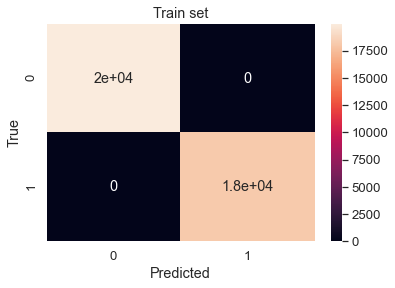

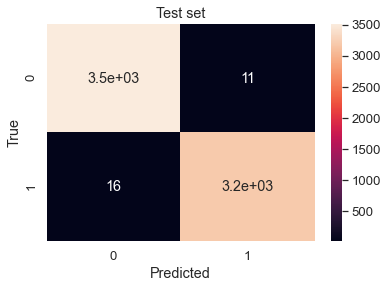

In [65]:
ModelElavuation(gscv_log, X_train, y_train, X_test, y_test)

    Accuracy   F1 Score  Precision     Recall  ROC_AUC
0  99.554566  99.554547  99.554687  99.554566    100.0



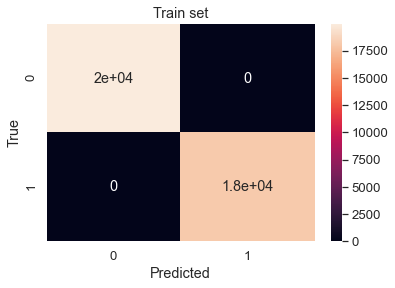

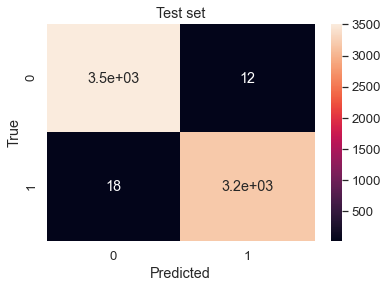

In [66]:
ModelElavuation(gscv_DT, X_train, y_train, X_test, y_test)

## Conclusion (1)

What I heave GREAT results with those 2 ML algorithms???? But are they really great once or mabye Fake news and Real news have key distinguishable differences? How is it possible to predict that great those 2 categories?

## Further Inspection

I trained only the text column since the date if I input True news before 2016 I can be missclassified or the news' subject as well. Also the subject column is not accurate at all as we saw we have only 2 for Real News

Let me just go back to Real news dataset and Fake one :

In [67]:
real_news

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [68]:
fake_news

,title,text,subject,date,category
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


We can see with naked eye the (Reuters) in the real news dataset. Reuters is internation information and news provider organization. Maybe it's some kind of CODE word for real news. Let's see the % of this wor in both sets:

In [69]:
print('Real news have: ', real_news.text.str.contains('(Reuters)').sum()/len(real_news))
print('Fake news have: ', fake_news.text.str.contains('(Reuters)').sum()/len(fake_news))

E:\programi\Anaconda Python\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


Real news have:  0.9981790166690012
Fake news have:  0.013244751075337506


Yes so basically it really show the test set what to category should be and maybe other observations are those who are misclassified.

In the fake news set I see 21st Century Wire... Let's see the % again.

In [70]:
print('Real news have: ', real_news.text.str.contains('21st Century').sum()/len(real_news))
print('Fake news have: ', fake_news.text.str.contains('21st Century').sum()/len(fake_news))

Real news have:  0.0011206051267684549
Fake news have:  0.055150973127209235


Let's inspect for dublicated text and remove those rows.

In [71]:
news[news.duplicated()]

,title,text,subject,date,category
9942,HILLARY TWEETS MESSAGE In Defense Of DACA…OOPS...,No time to waste we've got to fight with eve...,politics,"Sep 9, 2017",0
11446,FORMER DEMOCRAT WARNS Young Americans: “Rioter...,"Who is silencing political speech, physically...",politics,"Mar 10, 2017",0
14925,[VIDEO] #BlackLivesMatter Terrorists Storm Dar...,They were probably just looking for a safe sp...,politics,"Nov 16, 2015",0
23926,Senate tax bill stalls on deficit-focused 'tri...,WASHINGTON (Reuters) - The U.S. Senate on Thur...,politicsNews,"November 30, 2017",1
24259,Trump warns 'rogue regime' North Korea of grav...,BEIJING (Reuters) - U.S. President Donald Trum...,politicsNews,"November 8, 2017",1
...,...,...,...,...,...
44709,France unveils labor reforms in first step to ...,PARIS (Reuters) - French President Emmanuel Ma...,worldnews,"August 31, 2017",1
44744,Guatemala top court sides with U.N. graft unit...,GUATEMALA CITY (Reuters) - Guatemala s top cou...,worldnews,"August 29, 2017",1
44771,"Europeans, Africans agree renewed push to tack...",PARIS (Reuters) - Europe s big four continen...,worldnews,"August 28, 2017",1
44834,Thailand's ousted PM Yingluck has fled abroad:...,BANGKOK (Reuters) - Ousted Thai prime minister...,worldnews,"August 25, 2017",1


We have to get rid of these duplicated rows because mabye they can go to training and testing sets. We will have leaked label to the validation/training set. The number of rows are 209, it should be risky but let's see the results.

E:\programi\Anaconda Python\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


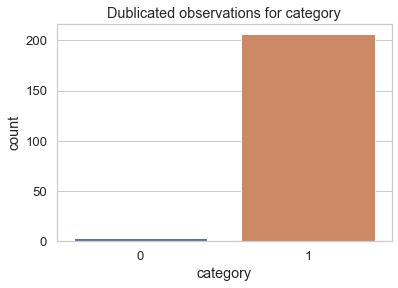

In [72]:
plt.title('Dublicated observations for category')
sns.countplot(news[news.duplicated()]['category'])
plt.show()

The majority is in the real news. Before droping the duplicated rows we have advantage for Fake news and after dropping them we will have 206 less and it's going to unbalance more. 

In [73]:
news_adjusted = news.drop_duplicates()

In [74]:
news_adjusted

,title,text,subject,date,category
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


#### I will remove (Reuters) and (21st Century Wire) in each oservation so I can make it more fair and less high biased data.

In [75]:
news_adjusted['text'] = news_adjusted['title'] + ' ' + news_adjusted['text'] 

E:\programi\Anaconda Python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [76]:
news_adjusted['text'] = news_adjusted['text'].replace('(Reuters)', '')

E:\programi\Anaconda Python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [77]:
news_adjusted['text'] = news_adjusted['text'].replace('21st Century Wire', '')

E:\programi\Anaconda Python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [78]:
news_adjusted.drop('title', axis  = 1)

,text,subject,date,category
0,Donald Trump Sends Out Embarrassing New Year’...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,News,"December 25, 2017",0
...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,worldnews,"August 22, 2017",1
44894,LexisNexis withdrew two products from Chinese ...,worldnews,"August 22, 2017",1
44895,Minsk cultural hub becomes haven from authorit...,worldnews,"August 22, 2017",1
44896,Vatican upbeat on possibility of Pope Francis ...,worldnews,"August 22, 2017",1


## Machine Learning (2)

Let's try again to see if we can gat less high biased models

In [79]:
news_adjusted['text']=news_adjusted['text'].apply(denoise_text)

E:\programi\Anaconda Python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [80]:
X_adjusted = news_adjusted['text']
y_adjusted = news_adjusted['category']

In [81]:
X_adjusted_train, X_adjusted_test, y_adjusted_train, y_adjusted_test = train_test_split(X_adjusted, y_adjusted,
                                random_state = 42, shuffle = True, stratify = y_adjusted, test_size = 0.15)

In [82]:
X_adjusted_train.shape, y_adjusted_train.shape, X_adjusted_test.shape, y_adjusted_test.shape

((37985,), (37985,), (6704,), (6704,))

In [83]:
X_adjusted_train_vectorised = TfidfVectorizer().fit_transform(X_adjusted_train)

In [84]:
GetModelScores(LogisticRegression(), X_adjusted_train_vectorised, y_adjusted_train)

Accuracity on Training: 0.9943398710017112 and Validating: 0.9910490983282875
F1_Score on Training: 0.9943400948687722 and Validating: 0.9910497941865773
ROC_AUC Score on Training: 0.9996469605140327 and Validating: 0.9991734509240395


In [85]:
GetModelScores(DecisionTreeClassifier(), X_adjusted_train_vectorised, y_adjusted_train)

Accuracity on Training: 1.0 and Validating: 0.9965775964196393
F1_Score on Training: 1.0 and Validating: 0.9965775034297658
ROC_AUC Score on Training: 1.0 and Validating: 0.9965418006609613


In [86]:
parameters_DT = [
    {
        'clf__estimator': [DecisionTreeClassifier()], 
        'vect__max_df': [0.75],
        'clf__estimator__criterion': ['entropy'],
        'clf__estimator__max_depth': [2, 20, 50, 100],
        'clf__estimator__min_samples_leaf': [1, 2, 4]  
    }
]

In [87]:
gscv_DT_adjusted = GridSearchCV(pipeline, parameters_DT,  scoring = 'f1')

In [88]:
gscv_DT_adjusted.fit(X_adjusted_train, y_adjusted_train)

GridSearchCV(estimator=Pipeline(steps=[('vect', TfidfVectorizer()),
                                       ('clf', ClfSwitcher())]),
             param_grid=[{'clf__estimator': [DecisionTreeClassifier(criterion='entropy',
                                                                    max_depth=100)],
                          'clf__estimator__criterion': ['entropy'],
                          'clf__estimator__max_depth': [2, 20, 50, 100],
                          'clf__estimator__min_samples_leaf': [1, 2, 4],
                          'vect__max_df': [0.75]}],
             scoring='f1')

In [89]:
gscv_DT_adjusted.best_score_

0.9962812138606759

    Accuracy   F1 Score  Precision     Recall  ROC_AUC
0  99.612172  99.612135  99.612739  99.612172    100.0



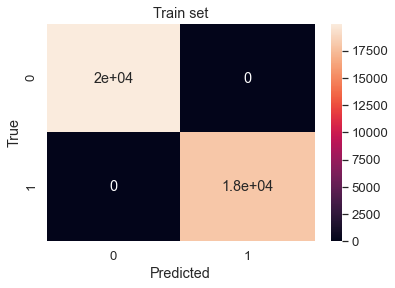

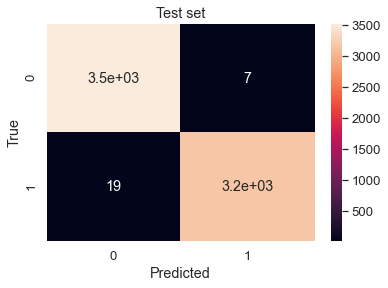

In [90]:
ModelElavuation(gscv_DT_adjusted, X_adjusted_train, y_adjusted_train, X_adjusted_test, y_adjusted_test)

## Conclusion|

So basically in general we have perfect models for only this dataset. I inspected some of the data leakage. The method for gathering data is not good because as we saw, we have "KEY" words (like Reuters or 21st Century) which indicates the model. We don't want this high bias or "cheat tuned" data. We saw with naked eye but obviusly the problem is still there, even though we did some more cleaning. I would suggest for more adequate data gathering and not putting "CHEATING" words in there. 

In news filter we have to really be careful for misclassification because for False Positive will lead to backlash from the author/publisher and their readers who trust them, resulting in distrust of the filter and their administrator.
Or for False Negatives Real news will not get to the people and they will miss maybe important information.  